<a href="https://colab.research.google.com/github/Alafiade/Research-Papers-Read/blob/main/Activation_Function_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**





In [1]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


**Downloading the CIFAR 10 Dataset.**





In [2]:
training_data = datasets.MNIST(
    root='data',
    train = True,
    download= True,
    transform= ToTensor()
)


testing_data = datasets.MNIST(
    root='data',
    train = False,
    download=True,
    transform = ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 92.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 17.6MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 101MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.07MB/s]


In [3]:
training_dataloader = DataLoader(training_data, batch_size=64)
testing_dataloader = DataLoader(testing_data,batch_size=64)

**Summary of Dataset**

In [4]:
testing_data, training_data

(Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

**LeNet5 architecture with Tanh**

In [5]:
class LeNet5tanh(nn.Module):
  def __init__(self):
    super().__init__()
    self.feature = nn.Sequential(
        #First layer
        nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5,stride=1,padding=2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),

        # Second layer
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5,stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2,stride=2),

    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =16*5*5, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120,out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84,out_features=10),
    )

  def forward(self,x):
    return self.classifier(self.feature(x))

model = LeNet5tanh()

In [7]:
from torchsummary import summary
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              Tanh-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             Tanh-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

**Defining optimizer and loss function**

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
loss_function = nn.CrossEntropyLoss()

**Training and test loop for the Lenet-tanh network**

In [10]:
def train_loop(dataloader, model,loss_function, optimizer, batch_size):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    # Compute prediction and loss
    pred = model(X)
    loss = loss_function(pred,y)

    # BackPropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f'loss: {loss:>7f}  [{current:>5d}/ {size:>5d}]')


def test_loop(dataloader, model, loss_function):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0


  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_function(pred,y).item()
      correct += (pred.argmax(1) ==  y).type(torch.float).sum().item()

  test_loss  /= num_batches
  correct /= size
  print(f'Test Error: |n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n')

**Training and Test logs**

In [11]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs=10
for t in range(epochs):
  print(f'Epoch {t+1}\n-------------------')
  train_loop(training_dataloader, model, loss_function, optimizer, batch_size=64)
  test_loop(testing_dataloader, model, loss_function)

print('Done')

Epoch 1
-------------------
loss: 2.305565  [   64/ 60000]
loss: 0.413512  [ 6464/ 60000]
loss: 0.314488  [12864/ 60000]
loss: 0.255386  [19264/ 60000]
loss: 0.171145  [25664/ 60000]
loss: 0.225450  [32064/ 60000]
loss: 0.108651  [38464/ 60000]
loss: 0.251609  [44864/ 60000]
loss: 0.200686  [51264/ 60000]
loss: 0.215871  [57664/ 60000]
Test Error: |n Accuracy: 95.5%, Avg loss: 0.142383

Epoch 2
-------------------
loss: 0.082085  [   64/ 60000]
loss: 0.136522  [ 6464/ 60000]
loss: 0.117518  [12864/ 60000]
loss: 0.099069  [19264/ 60000]
loss: 0.063038  [25664/ 60000]
loss: 0.107098  [32064/ 60000]
loss: 0.034772  [38464/ 60000]
loss: 0.117531  [44864/ 60000]
loss: 0.180575  [51264/ 60000]
loss: 0.168188  [57664/ 60000]
Test Error: |n Accuracy: 97.1%, Avg loss: 0.090448

Epoch 3
-------------------
loss: 0.039828  [   64/ 60000]
loss: 0.126597  [ 6464/ 60000]
loss: 0.055520  [12864/ 60000]
loss: 0.062385  [19264/ 60000]
loss: 0.064438  [25664/ 60000]
loss: 0.088162  [32064/ 60000]
loss: 

**LeNet 5 ReLU network**

In [12]:
class LeNet5Relu(nn.Module):
  def __init__(self):
    super().__init__()
    self.feature = nn.Sequential(
        #First layer
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=2, stride=2),

        # Second layer
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=2, stride=2),

    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=16*5*5,out_features=120),
        nn.ReLU(),
        nn.Linear(in_features=120,out_features=84),
        nn.ReLU(),
        nn.Linear(in_features=84, out_features=10),

    )

  def forward(self,x):
    return self.classifier(self.feature(x))

model_relu=LeNet5Relu()

In [13]:
summary(model_relu, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

In [14]:
def train_loop(dataloader, model_relu,loss_function, optimizer, batch_size):
  size = len(dataloader.dataset)
  model_relu.train()
  for batch, (X,y) in enumerate(dataloader):
    # Compute prediction and loss
    pred = model_relu(X)
    loss = loss_function(pred,y)

    # BackPropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f'loss: {loss:>7f}  [{current:>5d}/ {size:>5d}]')


def test_loop(dataloader, model_relu, loss_fn):
  model_relu.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0


  with torch.no_grad():
    for X,y in dataloader:
      pred = model_relu(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) ==  y).type(torch.float).sum().item()

  test_loss  /= num_batches
  correct /= size
  print(f'Test Error: |n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n')

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_relu.parameters(), lr= 0.001)

epochs =  10
for t in range(epochs):
  print(f'Epoch {t+1}\n--------------------')
  train_loop(training_dataloader, model_relu, loss_function , optimizer, batch_size=64)
  test_loop(testing_dataloader, model_relu, loss_function)

print('Done')

Epoch 1
--------------------
loss: 2.305927  [   64/ 60000]
loss: 0.504553  [ 6464/ 60000]
loss: 0.335167  [12864/ 60000]
loss: 0.303393  [19264/ 60000]
loss: 0.239320  [25664/ 60000]
loss: 0.269271  [32064/ 60000]
loss: 0.250383  [38464/ 60000]
loss: 0.360263  [44864/ 60000]
loss: 0.258097  [51264/ 60000]
loss: 0.206237  [57664/ 60000]
Test Error: |n Accuracy: 95.2%, Avg loss: 0.150697

Epoch 2
--------------------
loss: 0.108499  [   64/ 60000]
loss: 0.162484  [ 6464/ 60000]
loss: 0.083501  [12864/ 60000]
loss: 0.187870  [19264/ 60000]
loss: 0.078093  [25664/ 60000]
loss: 0.094959  [32064/ 60000]
loss: 0.062979  [38464/ 60000]
loss: 0.169981  [44864/ 60000]
loss: 0.218840  [51264/ 60000]
loss: 0.125177  [57664/ 60000]
Test Error: |n Accuracy: 96.9%, Avg loss: 0.101222

Epoch 3
--------------------
loss: 0.099343  [   64/ 60000]
loss: 0.128188  [ 6464/ 60000]
loss: 0.060420  [12864/ 60000]
loss: 0.164543  [19264/ 60000]
loss: 0.073629  [25664/ 60000]
loss: 0.071522  [32064/ 60000]
los

**LeNet Leaky ReLU network**

In [16]:
class LeNet5LRelu(nn.Module):
  def __init__(self):
    super().__init__()
    self.feature = nn.Sequential(
        #First layer
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
        nn.LeakyReLU(negative_slope=0.01),
        nn.AvgPool2d(kernel_size=2, stride=2),

        # Second layer
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
        nn.LeakyReLU(negative_slope=0.01),
        nn.AvgPool2d(kernel_size=2, stride=2),

    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=16*5*5,out_features=120),
        nn.LeakyReLU(negative_slope=0.01),
        nn.Linear(in_features=120,out_features=84),
        nn.LeakyReLU(negative_slope=0.01),
        nn.Linear(in_features=84, out_features=10),

    )

  def forward(self,x):
    return self.classifier(self.feature(x))

model_Lrelu=LeNet5LRelu()

In [17]:
from torchsummary import summary
summary(model_Lrelu, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         LeakyReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
         LeakyReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
         LeakyReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
        LeakyReLU-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

In [21]:
def train_loop(dataloader, model_Lrelu,loss_function, optimizer, batch_size):
  size = len(dataloader.dataset)
  model_Lrelu.train()
  for batch, (X,y) in enumerate(dataloader):
    # Compute prediction and loss
    pred = model_Lrelu(X)
    loss = loss_function(pred,y)

    # BackPropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f'loss: {loss:>7f}  [{current:>5d}/ {size:>5d}]')


def test_loop(dataloader, model_Lrelu, loss_fn):
  model_Lrelu.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0


  with torch.no_grad():
    for X,y in dataloader:
      pred = model_Lrelu(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) ==  y).type(torch.float).sum().item()

  test_loss  /= num_batches
  correct /= size
  print(f'Test Error: |n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n')

In [22]:
loss_function = nn.CrossEntropyLoss()
optimizer =  torch.optim.Adam(model_Lrelu.parameters(), lr=0.001)

epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\n--------')
  train_loop(training_dataloader, model_Lrelu, loss_function, optimizer, batch_size=64)
  test_loop(testing_dataloader, model_Lrelu, loss_function)


print('Done')

Epoch 1
--------
loss: 0.000789  [   64/ 60000]
loss: 0.006471  [ 6464/ 60000]
loss: 0.120921  [12864/ 60000]
loss: 0.007563  [19264/ 60000]
loss: 0.008753  [25664/ 60000]
loss: 0.063093  [32064/ 60000]
loss: 0.013394  [38464/ 60000]
loss: 0.019843  [44864/ 60000]
loss: 0.113356  [51264/ 60000]
loss: 0.056855  [57664/ 60000]
Test Error: |n Accuracy: 98.8%, Avg loss: 0.041814

Epoch 2
--------
loss: 0.004158  [   64/ 60000]
loss: 0.006345  [ 6464/ 60000]
loss: 0.013209  [12864/ 60000]
loss: 0.005051  [19264/ 60000]
loss: 0.040791  [25664/ 60000]
loss: 0.002111  [32064/ 60000]
loss: 0.009800  [38464/ 60000]
loss: 0.002144  [44864/ 60000]
loss: 0.048910  [51264/ 60000]
loss: 0.001807  [57664/ 60000]
Test Error: |n Accuracy: 98.9%, Avg loss: 0.041119

Epoch 3
--------
loss: 0.008051  [   64/ 60000]
loss: 0.001028  [ 6464/ 60000]
loss: 0.017100  [12864/ 60000]
loss: 0.016195  [19264/ 60000]
loss: 0.002362  [25664/ 60000]
loss: 0.009434  [32064/ 60000]
loss: 0.015923  [38464/ 60000]
loss: 0.

**Visualizing the Loss of the three networks**







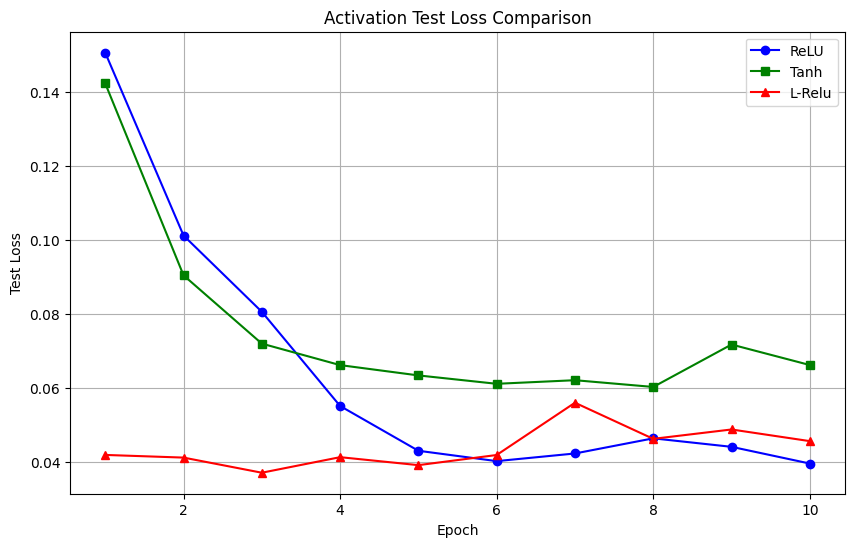

In [24]:
import matplotlib.pyplot as plt
epochs = list(range(1,11))


Lrelu_test_loss = [0.04184,0.041119,0.037025,0.041234,0.039076,0.041822,0.055969,0.046194,0.048730,0.045576]
relu_test_loss = [0.150697,0.101222,0.080582,0.055088,0.042966,0.040162,0.042233,0.046330,0.044034,0.03951]
tanh_test_loss = [0.142383,0.090448,0.071965,0.066150,0.063360,0.061091,0.062065,0.060239,0.071719,0.066170]


plt.figure(figsize=(10,6))
plt.plot(epochs, relu_test_loss,'b-o', label='ReLU')
plt.plot(epochs, tanh_test_loss, 'g-s', label='Tanh')
plt.plot(epochs, Lrelu_test_loss , 'r-^', label='L-Relu')

plt.title('Activation Test Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.grid(True)

plt.show()